Gráfico salvo em: /home/roni-chittoni/ProjectsHub/GAPD/core/laboratorio/data/processed/graphics/trendline_2025-01-06.png


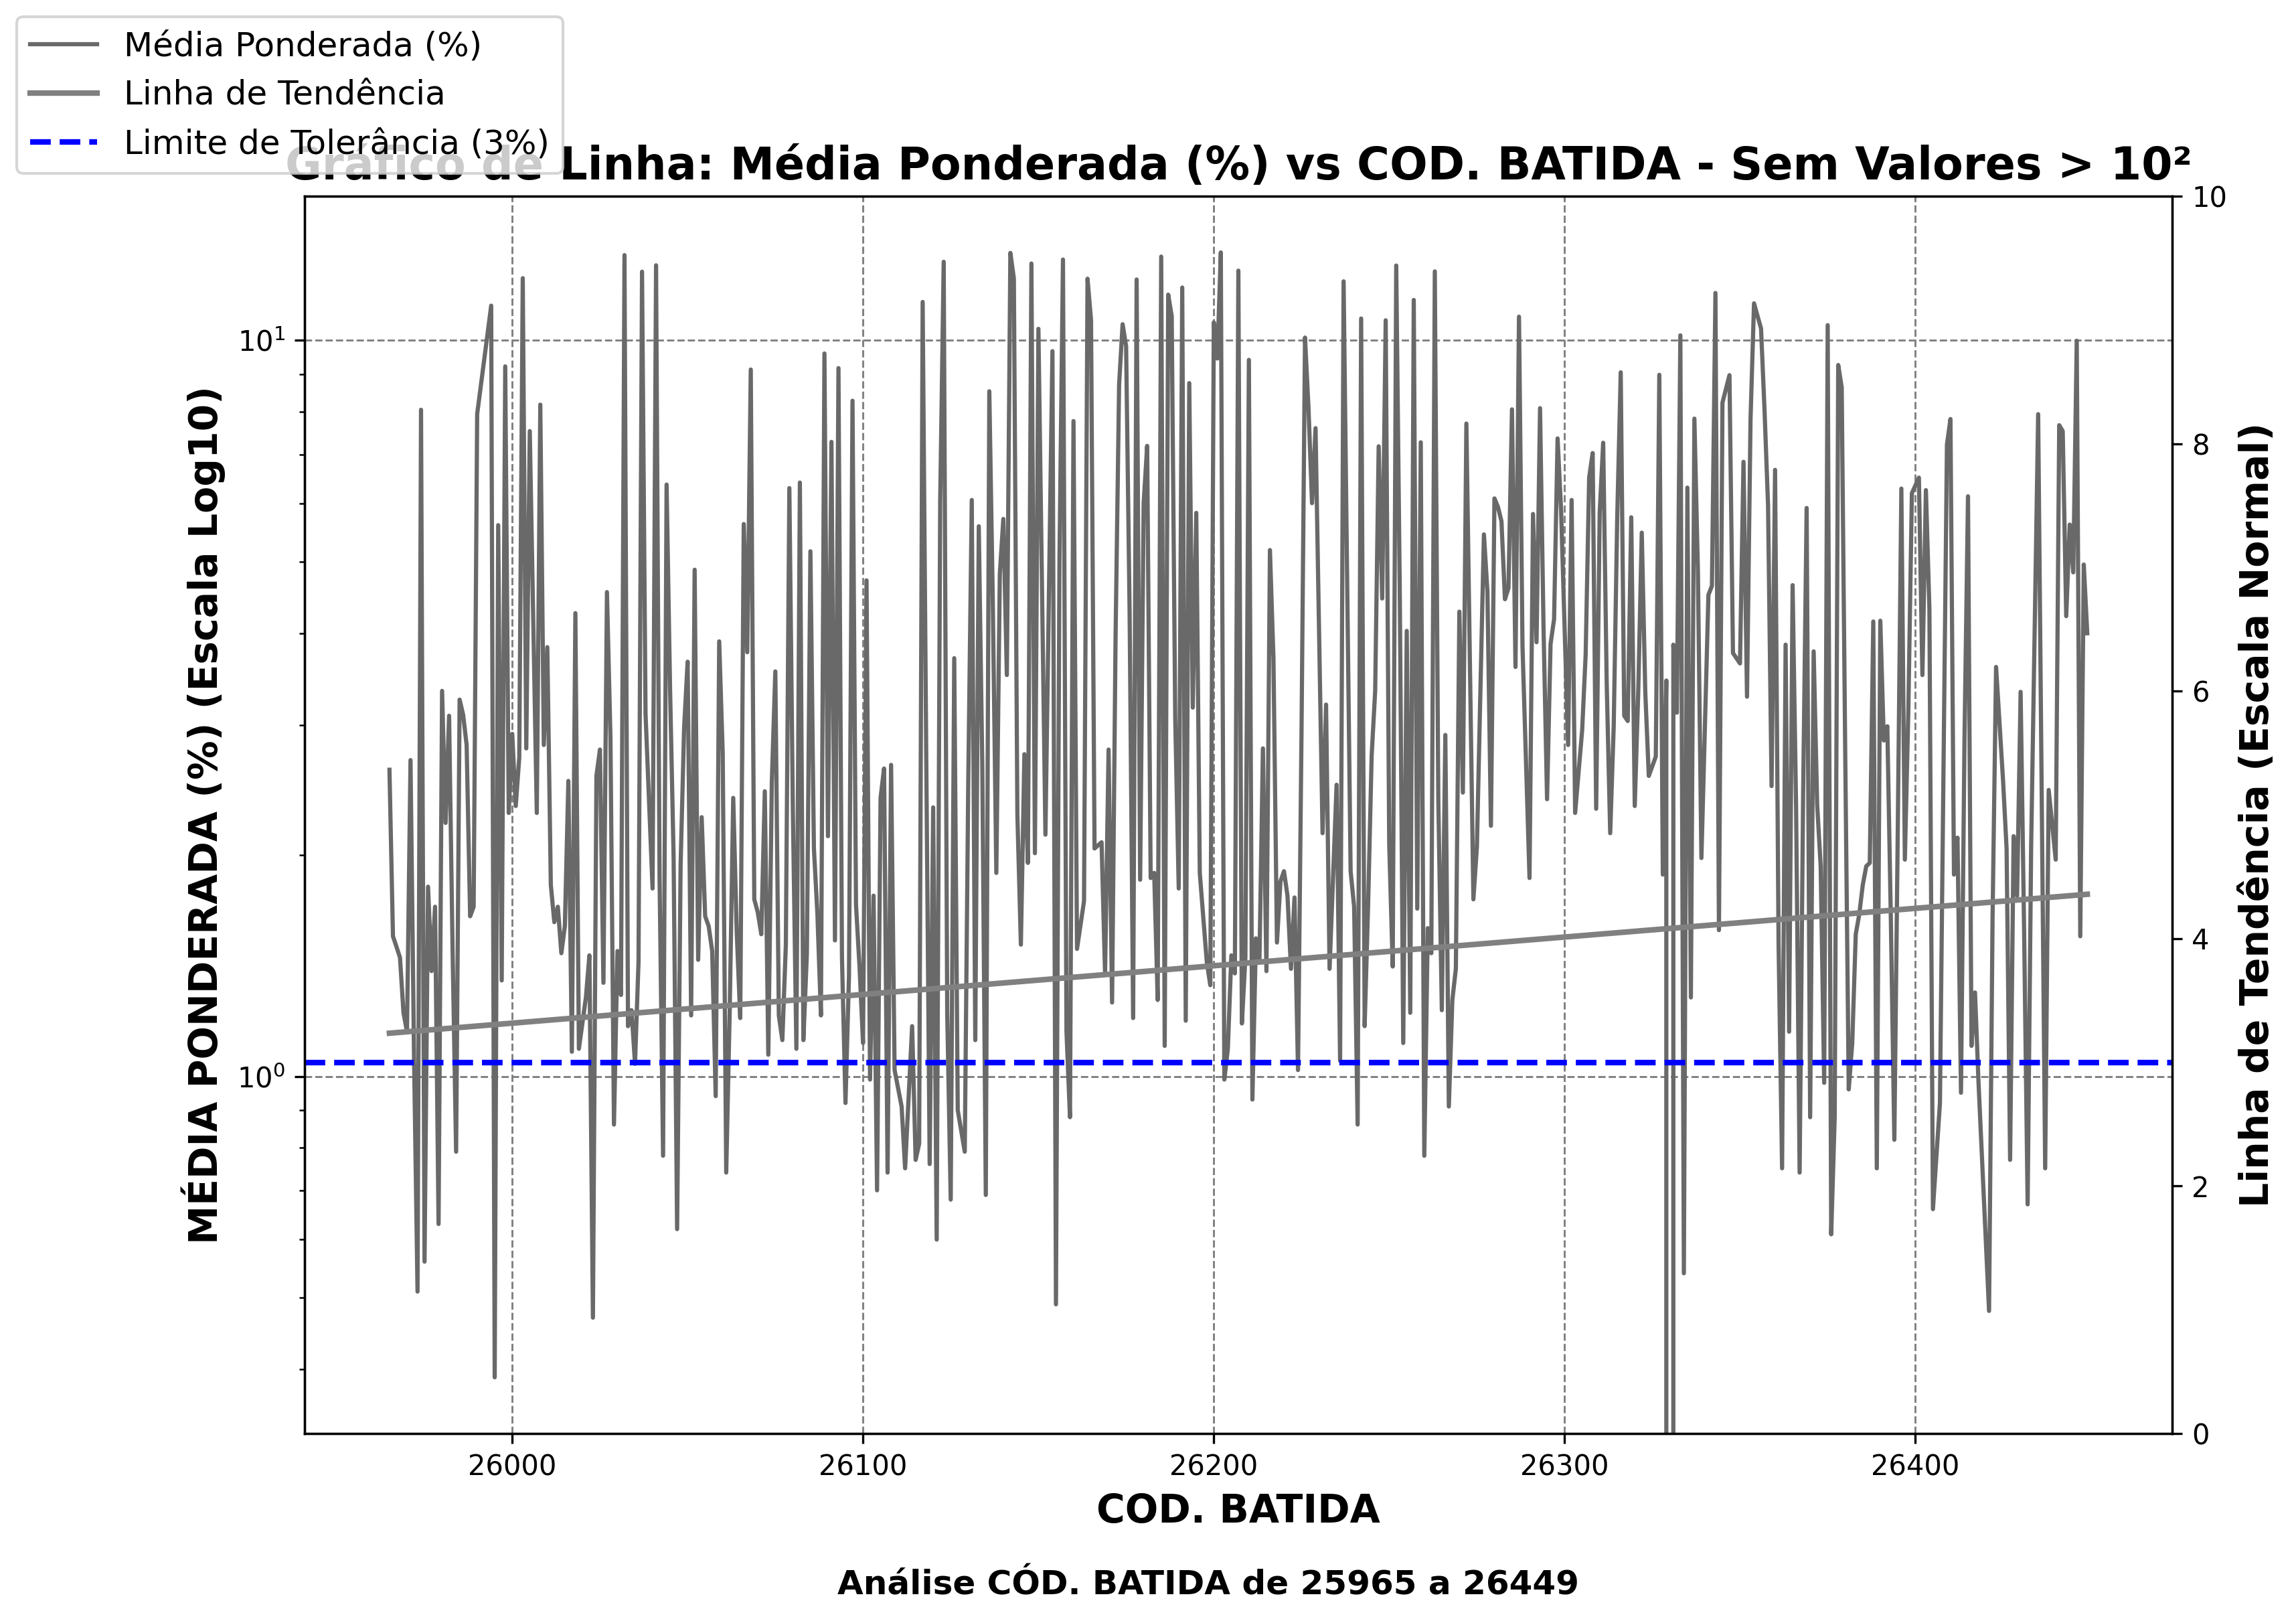

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Parte 1: Carregar e filtrar dados do Excel

# Definindo o caminho do arquivo e a aba que queremos analisar
caminho_arquivo = "/home/roni-chittoni/ProjectsHub/GAPD/core/laboratorio/data/raw/dadosprocessados/dados_processados.xlsx"
aba = "Dados Processados"

# Carregar os dados
if not os.path.isfile(caminho_arquivo):
    raise FileNotFoundError(f"Arquivo não encontrado: {caminho_arquivo}")

# Leitura dos dados usando pandas
df = pd.read_excel(caminho_arquivo, sheet_name=aba)

# Filtrar os dados removendo valores maiores que 10^2 em "MÉDIA PONDERADA (%)"
coluna_x = "COD. BATIDA"
coluna_y = "MÉDIA PONDERADA (%)"
df_filtrado = df[df[coluna_y] <= 10 ** 2]

# Remover outliers antes de calcular a linha de tendência
# Considerar como outliers valores que estão fora de 1.5 vezes o intervalo interquartil (IQR)
q1 = df_filtrado[coluna_y].quantile(0.25)
q3 = df_filtrado[coluna_y].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtrando os dados para remover outliers
df_filtrado = df_filtrado[(df_filtrado[coluna_y] >= limite_inferior) & (df_filtrado[coluna_y] <= limite_superior)]

# Parte 2: Definir a função para calcular a linha de tendência
# Vamos usar um ajuste linear direto sem transformar os valores em escala logarítmica
def linha_tendencia(x, y):
    coef = np.polyfit(x, y, 1)  # Ajuste linear nos valores reais
    return coef

# Calcular os coeficientes da linha de tendência
coef = linha_tendencia(df_filtrado[coluna_x], df_filtrado[coluna_y])

# Parte 3: Criar e visualizar o gráfico
titulo = "Gráfico de Linha: Média Ponderada (%) vs COD. BATIDA - Sem Valores > 10²"
periodo_inicio = df_filtrado[coluna_x].iloc[0]
periodo_fim = df_filtrado[coluna_x].iloc[-1]
periodo_texto = f"Análise CÓD. BATIDA de {periodo_inicio} a {periodo_fim}"

fig, ax1 = plt.subplots(figsize=(12, 8), dpi=300)

# Plotar a linha dos dados filtrados com escala logarítmica no eixo Y
ax1.plot(
    df_filtrado[coluna_x],
    df_filtrado[coluna_y],
    label="Média Ponderada (%)",
    color="dimgray",
    linewidth=1.5,
)
ax1.set_yscale("log")
ax1.set_xlabel(coluna_x, fontsize=14, fontweight="bold")
ax1.set_ylabel(f"{coluna_y} (Escala Log10)", fontsize=14, fontweight="bold")
ax1.tick_params(axis='y')

# Criar um segundo eixo Y para a linha de tendência e a linha de limite de tolerância com escala normal
dados_y_limite = (0, 10)
ax2 = ax1.twinx()

# Plotar a linha de tendência
y_tendencia = coef[0] * df_filtrado[coluna_x] + coef[1]
ax2.plot(
    df_filtrado[coluna_x],
    y_tendencia,
    color="grey",
    linestyle="-",
    linewidth=2.0,
    label="Linha de Tendência",
)

# Adicionar a linha de limite de tolerância em 3% no eixo Y normal
limite_tolerancia = 3
ax2.axhline(y=limite_tolerancia, color='blue', linestyle='--', linewidth=2, label="Limite de Tolerância (3%)")

# Ajustar limites do segundo eixo Y
ax2.set_ylim(dados_y_limite)
ax2.set_ylabel("Linha de Tendência (Escala Normal)", fontsize=14, fontweight="bold")
ax2.tick_params(axis='y')

# Adicionar o título e configurações gerais do gráfico
plt.title(titulo, fontsize=16, fontweight="bold")
fig.legend(loc="upper left", fontsize=12)
ax1.grid(True, linestyle="--", linewidth=0.7, color="gray")
ax1.set_facecolor("white")

# Inserir o texto do período na margem inferior
plt.figtext(0.5, 0.01, periodo_texto, ha="center", fontsize=12, fontweight="bold")

# Parte 4: Salvar e mostrar o gráfico
data_producao = datetime.now().strftime("%Y-%m-%d")
caminho_saida = f"/home/roni-chittoni/ProjectsHub/GAPD/core/laboratorio/data/processed/graphics/trendline_{data_producao}.png"

# Salvar o gráfico antes de exibir
try:
    plt.savefig(caminho_saida, format="png", bbox_inches="tight", pad_inches=0.2)
    print(f"Gráfico salvo em: {caminho_saida}")
except PermissionError:
    print(f"Permissão negada ao tentar salvar o arquivo: {caminho_saida}. Verifique as permissões do diretório.")
except Exception as e:
    print(f"Erro inesperado ao salvar o gráfico: {str(e)}")

# Mostrar o gráfico
plt.show()

# Fechar o gráfico para liberar recursos
plt.close()
